In [1]:
from src.training.services.easy_train import easy_train
import torch

/run/media/john/Secondary/Documents/Cornell/Spring 2024/CS4756 Robot Learning/il-pre-train-dqn/.venv/lib64/python3.11/site-packages/gymnasium/utils/play.py:29: UserWarning: WARN: matplotlib is not installed, run `pip install gymnasium[other]`
  logger.warn("matplotlib is not installed, run `pip install gymnasium[other]`")


In [2]:
episodes = 5000
train_vis_points = [100, 500, 1000, 2000, 3000, 4999]

In [3]:
# target_updates = [100, 500, 1000]
# target_updates = [500,1000]
target_updates = [1000]
# pretrain_epochs = [0, 10, 100, 500]
pretrain_epochs = [0, 10]

In [4]:
envs = {
    # "MountainCar-v0": "./src/pretrain/data/MountainCar-v0_10_000.npy", already done
    # "LunarLander-v2": "src/pretrain/data/LunarLander-v2_10_000.npy", already done
    "Acrobot-v1": "src/pretrain/data/Acrobot-v1_10_000.npy",
}

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 500/500 [01:57<00:00,  4.25it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Finished training for Acrobot-v1


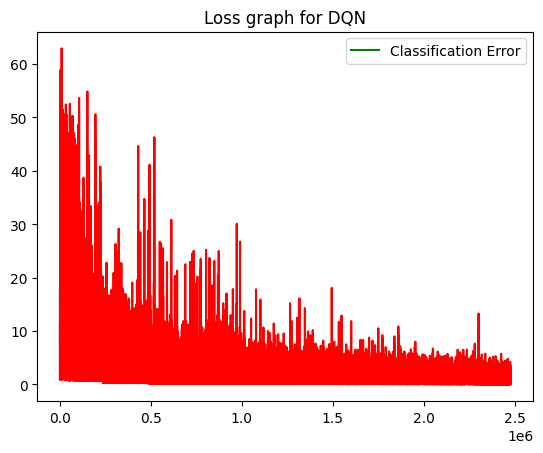

In [6]:
for env_name, pretrain_data in envs.items():
    for target_update in target_updates:
        for pretrain_epoch in pretrain_epochs:
            easy_train(
                env_name=env_name,
                train_vis_points=train_vis_points,
                num_training_episodes=episodes,
                pretrain_data_path=pretrain_data,
                pretrain_epochs=pretrain_epoch,
                target_update=target_update,
                video_output_dir=f"./tmpvideo/{env_name}",
                rewards_output_dir=f"./tmp/{env_name}",
                graph_output_dir=f"./tmpgraphs/{env_name}",
                save_model_path=f"./tmpmodels/{env_name}",
                device=device
            )
    print(f"Finished training for {env_name}")